# Pytorch workflow

Let´s explore an example Pytorch end to end workflow

*RESOURCES:*
<br>    * Ground truth notebook: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
<br>    * Book version of notebook: https://www.learnpytorch.io/01_pytorch_workflow/
<br>    * Ask a question: https://github.com/mrdbourke/pytorch-deep-learning/discussions


In [201]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data(training)",
                      4: "making predictions and evaluating a model(inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'making predictions and evaluating a model(inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [202]:
import torch
from torch import nn #nn contains all of Pytorch ´s building blocks for NEURAL NETWORKS
import matplotlib.pyplot as plt

# Check pytorch version
torch.__version__

'2.5.1+cu121'

### DATA (PREPARING AND LOADING)

DATA can be almost anything.. in machine learning
* Excel spreadsheet
* images of any kind
* Videos (Youtube has lots of data)
* Audio like songs or podcasts
* DNA
* Text
  
Machine Learning is a game of two parts:
1. Get data into numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, Let´s create some *KNOWN* data using the linear regression formula:

We´ll use a linear regression formula to make a straight line with known *(**parameters**)*

In [203]:
# Create *known * parameters

weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim =1)
print(f"Dimension of X: {X.dim()}")
y = weight*X + bias
print(f" X matrix{X[:10]} \n Output: {y[:10]}")

Dimension of X: 2
 X matrixtensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) 
 Output: tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [204]:
len(X), len(y)

(50, 50)

### Spliting the data into training and test sets(one of the most important concepts in machine learning)
 information: https://www.learnpytorch.io/01_pytorch_workflow/#split-data-into-training-and-test-sets

 Let´s create a training and test data set with our data:

In [205]:
# Create a train/test split
train_split = int(0.8 * len(X))
train_split
X_train, y_train = X[:train_split], y[:train_split] # X[:train_split] this will chose the data set from 0 index till the index train split is indicating

# Now creating a test data
X_test, y_test = X[train_split:], y[train_split:] # We know that in train data set it was containing **40** data points so remaining **10** points will be used for test 

len(X_train), len(X_test) , len(y_train), len(y_test)

(40, 10, 40, 10)

### DATA VISUALIZATION (*creating a function*)

In [257]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=None):
    """
    Plots training data, test data and compare predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

    #Plot testing data in green
    plt.scatter(test_data, test_labels, c= "g", s=4, label= "Test Data")

    # Are there predicitions?
    if predictions is not None:
        # plot predictions if available
        plt.scatter(test_data, predictions, c="r", s=4, label= "predictions")

    # Show the legend
    plt.legend(prop={"size" : 8});
        

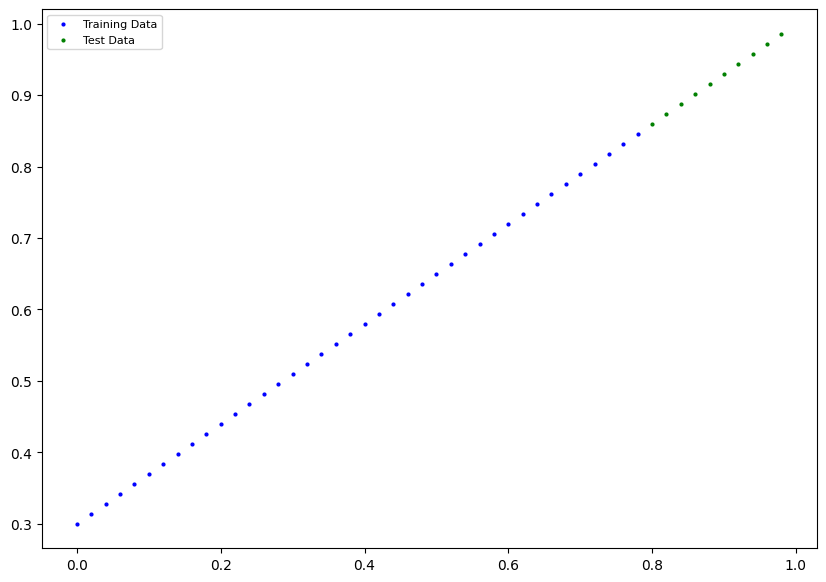

In [258]:
plot_predictions();

### CREATING FIRST PyTorch MODEL FOR LINEAR REGRESSION

### 2. BUILD MODEL

Our first Pytorch model

LINEAR REGRESSION MODEL: **y = a+bx**

Because we are going to be building classes throughtout the course, I´d recommend getting familiar with OOP in Python.
<br>**Resource:** https://realpython.com/python3-object-oriented-programming/ 
<br> What our model does:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better representation( or get closer to ) the ideal values ( the weight and bias values we used to create the data )

<br> How does it do so?

Through two main algorithms:
1. Gradient descent: https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Backpropogation:  https://youtu.be/Ilg3gGewQ5U

In [259]:
# Create linear regression model class
class LinearRegressionModel(nn.Module):  #  Almost everything in Pytorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and tra to adjust it to the ideal weight
                                                requires_grad=True, # <- can this parameter be updated via gradient descent?
                                                dtype=torch.float)) # <- Pytorch loves the datatype torch.float32
        
        self.bias = nn.Parameter(torch.randn(1, #<- start with a random bias and tra to adjust it to the ideal bias
                                             requires_grad=True, # <- can this parameter be updated via gradient descent?
                                             dtype=torch.float)) # <- Pytorch loves the datatype torch.float32

        # Forward method to feine the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:  # "x" is the input data
        return self.weights*x + self.bias # This is the linear regression formula

### Pytorch Model building essentials

<br>* torch.nn - Contains all of the buildings for computational graphs(another word for Neural Networks)
<br>* torch.nn.parameters - What parameters should our model try and learn, often a Pytorch layer from torch.nn will set these for us
<br>* torch.nn.Module - The base Class for all neural network modules. if you subclass it, you overwrite forward()
<br>* torch.optim- this is where optimization happens of gradient descent
<br>* def forward() - All nn.Modules subclass require you to overwrite forawrd(). This method defines what you want your model to do.

#### PyTorch CHEAT SHEET : https://docs.pytorch.org/tutorials/beginner/ptcheat.html

In [260]:
# Checking parameter of the Linear Regression model that we made
torch.manual_seed(42) # To make it static because in model we are using torch.randn
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [261]:
# List named parameters
model_0.state_dict()  # another way to look at the parameters and show with the names

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [262]:
weight, bias #These are the hard codes values that we coded in the starting and now we have to train our model to achieve this coded weight and bias. Onces it is achieved we will understand that our model is trained

(0.7, 0.3)

### Making Predictions using our Random Model using inference mode

### using `torch.inference_mode()`

To check our model´s predictive power, lets see how well it produces `y_test` based on `X_test`.
When we pass data through our model, it´s going to run it through the forward() method.

In [263]:
# Actual value of X_test and Y_test 
X_test, y_test # So now our prediction should be equal to the y_test tensor

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [264]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

# We can also do it like but this will keep track of gradient and it will take memory but inference doesn´t record gradient and keep memory short
# y_preds = model_0(X_test)
# y_preds 

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

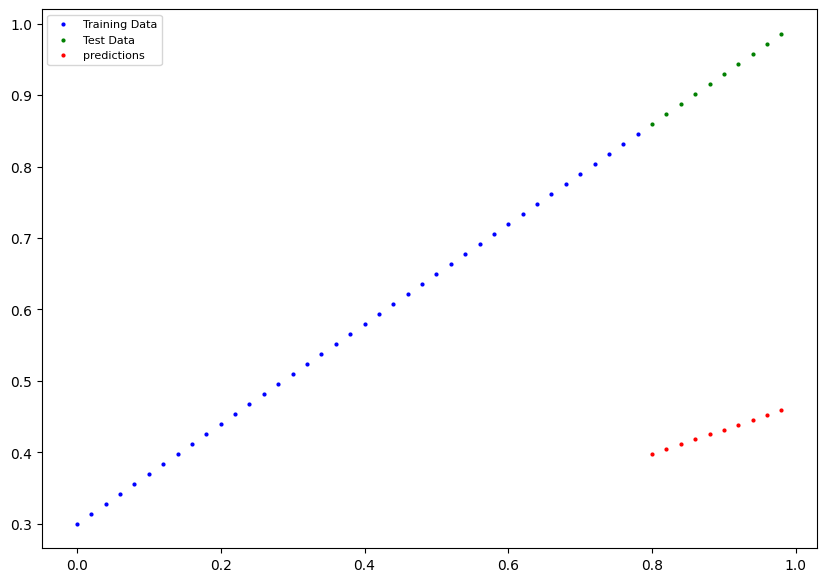

In [265]:
plot_predictions(predictions=y_preds) # We can see that our model is predicting really far away and ideal model should be predicting perfectly

### 3. Train Model

The whole idea of training for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.
<br> Or in other words from a poor representation of the data to a better representation of the data 
<br> One way to measure how poor or wrong your models predictions are is to use  ***LOSS FUNCTION***
* NOTE: Loss function may also be called "Cost Function" or criterion in different areas. For our case, We are going to refer to it as a loss function

Things we need to train;

* **LOSS FUNCTION:** A function to measure how wrong your models predictions are to the ideal outputs, lower is better. https://docs.pytorch.org/docs/stable/nn.html#loss-functions
* **OPTIMIZER:**  Takes into account the loss of a model and adjusts the model´s performance (eg: weight and bias).
  https://docs.pytorch.org/docs/stable/optim.html
    * inside optimizer you´ll often have to set two parameters:
        * `params-`  the model paramters you´d like to optimize, e.g: `params=model_0.parameters()` 
        * `lr(learning rate)-` the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step(a small `lr` results in large change)

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [266]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [267]:
model_0.state_dict()
# Checking the error between our prediction and the data we have:
print(f"Error: {(y_preds[0] - y_test[0])}")

Error: tensor([-0.4618])


In [268]:
# Setup a loss Function
loss_fn = nn.L1Loss() #Initiating MAE(Mean absolute) we have other loss functions in PyTorch as well
loss_fn

L1Loss()

In [269]:
# Setup an Optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params= model_0.parameters(),
                            lr = 0.01, # Learning rate : it is a hyper parameter
                            momentum = 0.9)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

**Q:** What a loss function and optimzers should i use?
<br>**A:** This will be problem specific. But with experience, you´ll get an idea of what works and what doesn´t with your particular problem set.
<br>For Example: for a regression problem (like ours), a loss function of `nn.L1Loss()` and an optimzer like `torch.optim.SGD()` will suffice
But for a classification problem like classifying whether a photo is of a dog or a cat, you´ll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss)

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
 1. Loop through the data
 2. Forward pass (this invloves data moving thorugh our model´s `forward()` to make predictions on data- also called forward propogation.
 3. Calculate the loss (compare forward pass predictions to fround truth labels)
4. Optimizer zero grad
5. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss
6. Optimizer step - use the optimizer to adjust our model´s parameters to try and improve the loss (**GRADIENT DESCENT**)

In [270]:
# An epoch is one loop through the data
torch.manual_seed(42)
epochs = 200

# Track different values
epoch_count =[]
loss_values = []
test_loss_values = []

### TRAINING
# 1. Loop through the data
for epoch in range(epochs):
    # set the model to training mode
    model_0.train() # train mode in Pytorch sets all parameters that require gradients to require gradient
    
    # 2. Forward pass
    y_pred = model_0(X_train)

    # 3. Calculate Loss and use the loss function we created before
    loss = loss_fn(y_pred, y_train)
    # print(f" Loss:{loss}")  # Just to check value of loss function on every epoch
    
    # 4. Optimizer zero grad
    optimizer.zero_grad()

    # 5. Perform backprogogation on the loss with respect to the parameters of the model
    loss.backward()

    # 6. Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will accumulate through the loop so.. we have to zero them above in step 3 for the next iteration of the loop 

    # Testing
    model_0.eval() # turns off different settings in the model not needed for evaluation / testing (dropout/ batchnorm layers)
    with torch.inference_mode():  # turn off gradient tracking and a couple more things behind which are not required in testing
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. Calculate test loss
        test_loss = loss_fn(test_pred,y_test)

    # Printing out what is happening
    if epoch%10==0:  # we dont want to print on every line
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f" Epoch: {epoch} I Loss: {loss} I Test loss: {test_loss}")

        
        
#print(f" Loss:{loss}")
#print(f"{model_0.state_dict()}")

 Epoch: 0 I Loss: 0.31288138031959534 I Test loss: 0.48106518387794495
 Epoch: 10 I Loss: 0.10313145816326141 I Test loss: 0.026505161076784134
 Epoch: 20 I Loss: 0.06960087269544601 I Test loss: 0.1943041831254959
 Epoch: 30 I Loss: 0.04656733572483063 I Test loss: 0.027078520506620407
 Epoch: 40 I Loss: 0.021285563707351685 I Test loss: 0.001966828014701605
 Epoch: 50 I Loss: 0.015717655420303345 I Test loss: 0.0101406155154109
 Epoch: 60 I Loss: 0.009445302188396454 I Test loss: 0.0240285936743021
 Epoch: 70 I Loss: 0.00741451233625412 I Test loss: 0.007351106498390436
 Epoch: 80 I Loss: 0.0018297791248187423 I Test loss: 0.00930970348417759
 Epoch: 90 I Loss: 0.004054549150168896 I Test loss: 0.004079192876815796
 Epoch: 100 I Loss: 0.005789103917777538 I Test loss: 0.011751502752304077
 Epoch: 110 I Loss: 0.004738835152238607 I Test loss: 0.0048580230213701725
 Epoch: 120 I Loss: 0.005505512002855539 I Test loss: 0.010634821839630604
 Epoch: 130 I Loss: 0.0063748410902917385 I Tes

In [271]:
# epoch_count, loss_values, test_loss_values # just to check which values are on tensor and which are not 

Text(0, 0.5, 'loss')

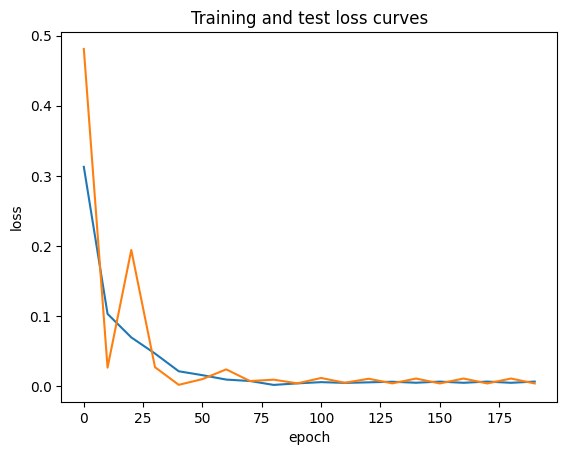

In [272]:
# first we have to change values from tensors to numpy otherwise we will get error
import numpy as np
# Plot loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label= "Tess loss")
plt.title("Training and test loss curves")
plt.xlabel("epoch")
plt.ylabel("loss")

In [273]:
# predictions after training model
with torch.inference_mode():
    y_preds_new = model_0(X_test)
print(y_preds_new)

print(f"{model_0.state_dict()}")

tensor([[0.8565],
        [0.8706],
        [0.8847],
        [0.8987],
        [0.9128],
        [0.9269],
        [0.9409],
        [0.9550],
        [0.9691],
        [0.9831]])
OrderedDict([('weights', tensor([0.7034])), ('bias', tensor([0.2938]))])


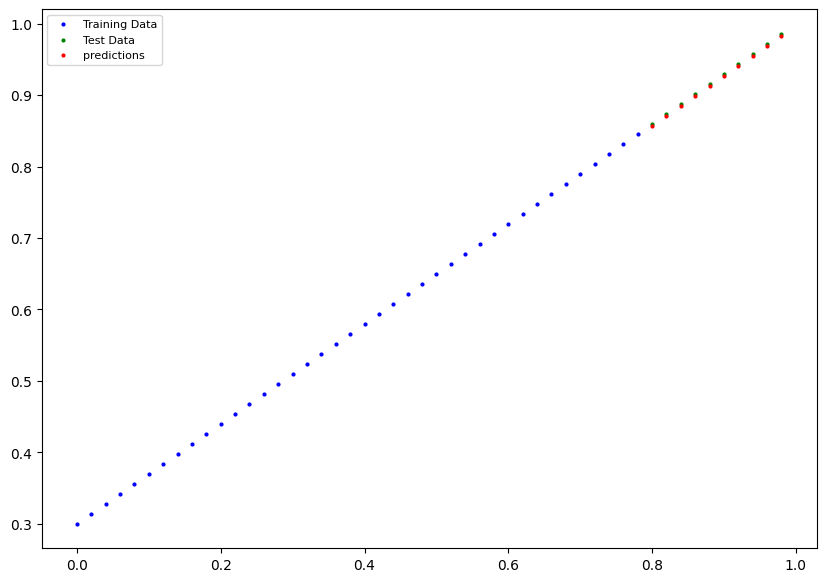

In [274]:
plot_predictions(predictions = y_preds_new)

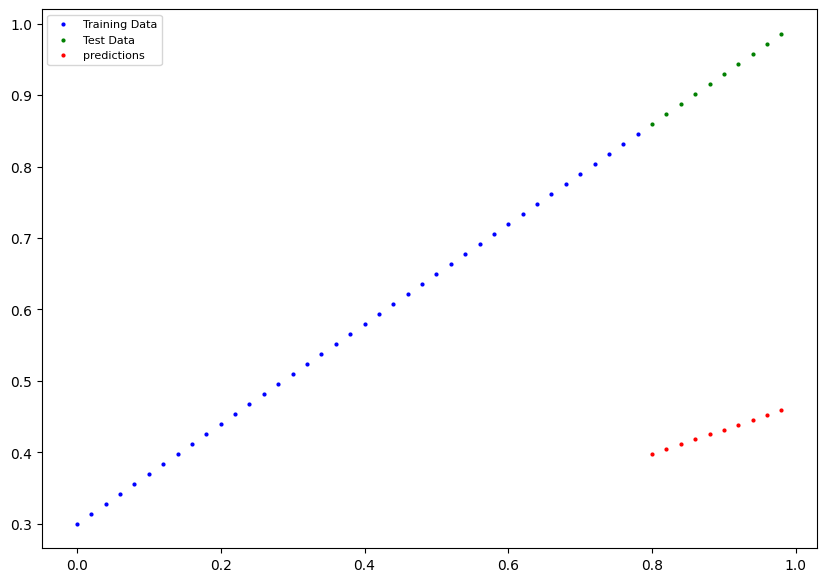

In [275]:
# old predictions
plot_predictions(predictions = y_preds)

In [240]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7034])), ('bias', tensor([0.2938]))])

In [241]:
weight,bias

(0.7, 0.3)